In [1]:
!pip install feyn

     -------------------------------------- 224.6/224.6 kB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 67.1/67.1 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 23.3 MB/s eta 0:00:00
     ---------------------------------------- 108.9/108.9 kB ? eta 0:00:00
     ------------------------------------- 436.0/436.0 kB 26.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2


In [44]:
import feyn

ql = feyn.QLattice(random_seed=42)

In [4]:
import pandas as pd

data = pd.read_csv("../Runge-Kutta-Integration/rungekutta_prepared.csv")

In [6]:
models = ql.auto_run(data, output_name='y')

In [39]:
sympy_model = models[0].sympify(signif=3)

In [21]:
sympy_model.as_expr()

2.34*(0.000585*x + (0.0992*x - 1)**2*exp(-6.66*(0.0554*x - 1)**2*(0.482*x - 1)**2) - 0.259)**2 - 0.138

In [28]:
import sympy as smp
from sympy.utilities.lambdify import lambdify

x_symbol = smp.symbols("x")

f = lambdify([x_symbol], sympy_model)

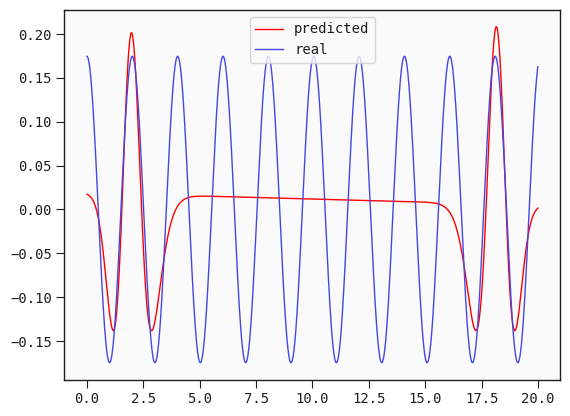

In [40]:
import numpy as np
import matplotlib.pyplot as plt

x = data.x
y_model = f(x)
y_real = data.y

plt.plot(x, y_model, label="predicted", c="red", linewidth=1)
plt.plot(x, y_real, label="real", linewidth=1)
plt.legend()
plt.show()

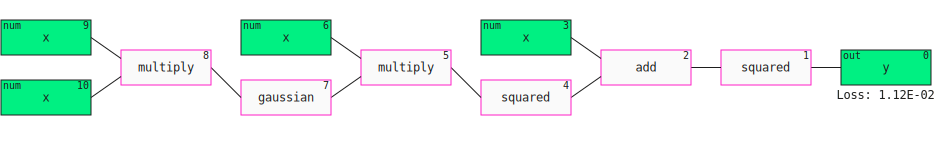

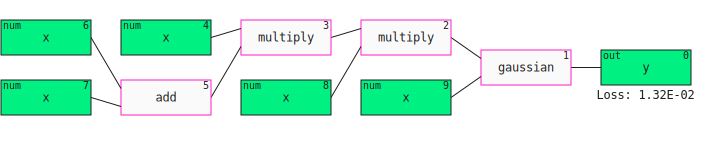

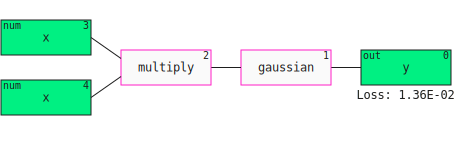

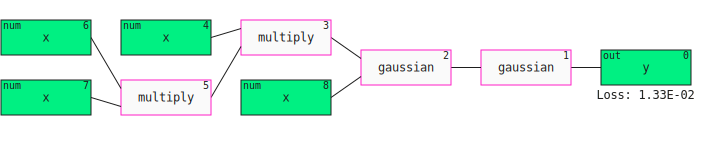

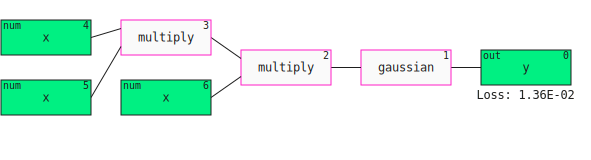

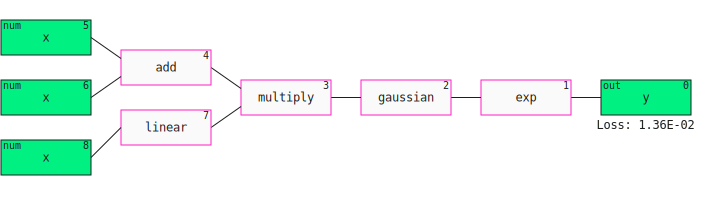

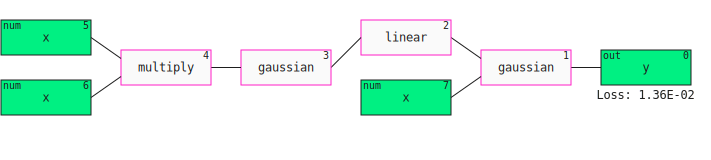

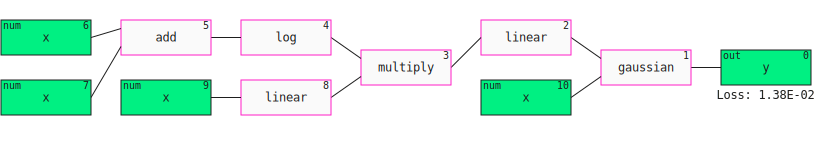

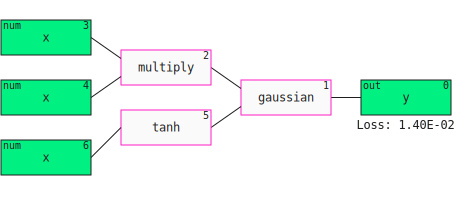

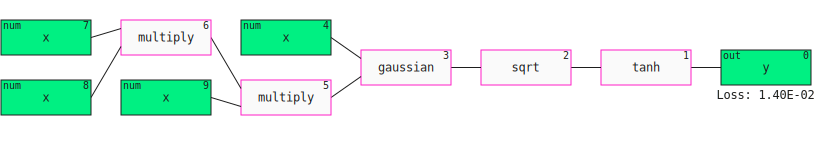

In [46]:
for model in models:
    display(model)